## Name: 
## Instructor: 
## Cohort: 
## Project: Applied Data Science Sales Analysis



## Project Statement:

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities.
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:
   1. Determine the states that are generating the highest revenues and
   2. Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.

## Step 0: Import libraries

In [34]:
import pandas as pd
import numpy as np
#import pycountry
import datetime
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings('ignore')

## Step 1: Import Data

- Read dataset

In [35]:
## dataset drive link - https://drive.google.com/file/d/1EP4gFjfCfZ181JAG3W2uocFD9i3LFnLb/view?usp=sharing
df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv',parse_dates = True)
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


- Check data general info

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


- Check stats of each column in df

In [37]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


# Step 2: Data Cleaning + Preprocessing




### Data in general:

#### 1. Duplicated records

In [38]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


#### 2. Checking for datatypes and converting Object to String  

In [39]:
print(df['Time'].unique())
print(df['State'].unique())
print(df['Group'].unique())

[' Morning' ' Afternoon' ' Evening']
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
[' Kids' ' Men' ' Women' ' Seniors']


#### 3. Rename Cols & formatting

In [40]:
# Convert object to string
df['Time'] = df['Time'].astype('string')
df['State'] = df['State'].astype('string')
df['Group'] = df['Group'].astype('string')

#### 4. Data Type check

In [41]:
df.dtypes

,0
Date,object
Time,string[python]
State,string[python]
Group,string[python]
Unit,int64
Sales,int64


### Numeric

#### 1. Missing entries
- Check missing entries

In [42]:
df.isnull().sum()

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


#### 2. Local values

In [43]:
print('Unit: min =', df['Unit'].min(), ', max =', df['Unit'].max())
print('Sales: min =', df['Sales'].min(), ', max =', df['Sales'].max())

Unit: min = 2 , max = 65
Sales: min = 5000 , max = 162500


#### 3. Identifying outliers
  - We checked for outliers in 'Unit' and 'Sales'
  - An outlier is identified if its value in not between the Lower and Upper Bound.
    - Lower Bound: (Q1 - 1.5 * IQR)
    - Upper Bound: (Q3 + 1.5 * IQR)

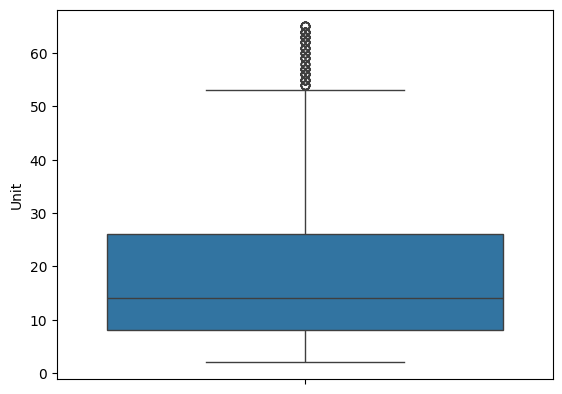

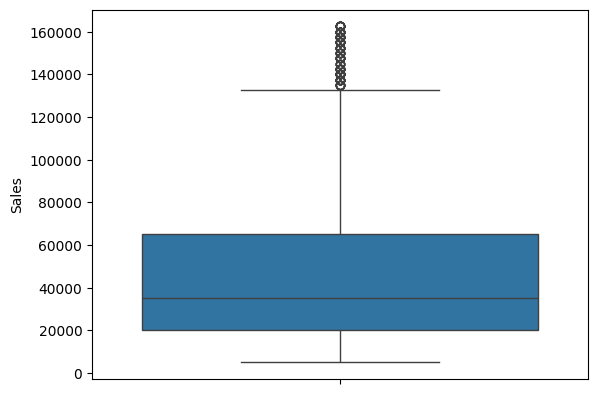

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [44]:
sns.boxplot(df["Unit"])
plt.show()

sns.boxplot(df['Sales'])
plt.show()

df['Unit'].describe()
_25, _75 = np.percentile(df["Unit"],[25,75])
irq = _75 - _25
unit_upper = _75 + 1.5*irq
unit_lower = _25 - 1.5*irq


df['Sales'].describe()
_25, _75 = np.percentile(df["Sales"],[25,75])
irq = _75 - _25
sales_upper = ( _75 + 1.5*irq)
sales_lower = ( _25 - 1.5*irq)

df.describe()

In [45]:
# Count outliers in 'Unit' column
unit_outliers = df[(df['Unit'] < unit_lower) | (df['Unit'] > unit_upper)]['Unit'].count()

# Count outliers in 'Sales' column
sales_outliers = df[(df['Sales'] < sales_lower) | (df['Sales'] > sales_upper)]['Sales'].count()

print("Number of outliers in 'Unit':", unit_outliers)
print("Number of outliers in 'Sales':", sales_outliers)

Number of outliers in 'Unit': 123
Number of outliers in 'Sales': 123


In [46]:
# Calculate percentage of outliers in 'Unit' column
percentage_unit_outliers = (unit_outliers / len(df)) * 100

# Calculate percentage of outliers in 'Sales' column
percentage_sales_outliers = (sales_outliers / len(df)) * 100

print("Percentage of outliers in 'Unit': {:.2f}%".format(percentage_unit_outliers))
print("Percentage of outliers in 'Sales': {:.2f}%".format(percentage_sales_outliers))

Percentage of outliers in 'Unit': 1.63%
Percentage of outliers in 'Sales': 1.63%


# 4. Normalization

In [47]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Unit' column and add it to the DataFrame
df['normalized_Unit'] = scaler.fit_transform(df[['Unit']])

# Fit and transform the 'Sales' column and add it to the DataFrame
df['normalized_Sales'] = scaler.fit_transform(df[['Sales']])

df.describe()

,Unit,Sales,normalized_Unit,normalized_Sales
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


## Step 3: Data Analysis

### Perform descriptive statistical analysis on the data (Sales and Unit columns).

In [48]:
df.describe()

,Unit,Sales,normalized_Unit,normalized_Sales
count,7560.000000,7560.000000,7560.000000,7560.000000
mean,18.005423,45013.558201,0.254054,0.254054
std,12.901403,32253.506944,0.204784,0.204784
min,2.000000,5000.000000,0.000000,0.000000
25%,8.000000,20000.000000,0.095238,0.095238
50%,14.000000,35000.000000,0.190476,0.190476
75%,26.000000,65000.000000,0.380952,0.380952
max,65.000000,162500.000000,1.000000,1.000000


### Determine which group is generating the highest sales, and which group is generating the lowest sales.

In [49]:
# Group by 'Group' and sum their sales
grouped_sales = df.groupby('Group').Sales.sum()

# Find the group names with maximum and minimum sales
group_max_sales = grouped_sales.idxmax()
print(group_max_sales)
group_min_sales = grouped_sales.idxmin()
print(group_min_sales)

print('{} generate the highest sales, while {} generate the lowest sales.'.format(group_max_sales,group_min_sales))

## Can learners find the value of Sales for groups - 'Men' and 'Seniors'

 Men
 Seniors
 Men generate the highest sales, while  Seniors generate the lowest sales.


### Determine which state is generating the highest sales, and which state is generating the lowest sales.

In [50]:
# Group by 'State' and sum their sales
state_sales = df.groupby('State').Sales.sum()

# Find the group names with maximum and minimum sales
state_max_sales = state_sales.idxmax()
print(state_max_sales)
state_min_sales = state_sales.idxmin()
print(state_min_sales)

print('{} generate the highest sales, while {} generate the lowest sales.'.format(state_max_sales,state_min_sales))

 VIC
 WA
 VIC generate the highest sales, while  WA generate the lowest sales.


### Generate weekly, monthly and quarterly reports for the analysis made.

In [51]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)  # Set date column as index

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              7560 non-null   string 
 1   State             7560 non-null   string 
 2   Group             7560 non-null   string 
 3   Unit              7560 non-null   int64  
 4   Sales             7560 non-null   int64  
 5   normalized_Unit   7560 non-null   float64
 6   normalized_Sales  7560 non-null   float64
dtypes: float64(2), int64(2), string(3)
memory usage: 472.5 KB


In [52]:
# Weekly Report: resample by week and start with Monday
weekly_report = df.resample('W-MON').sum()
print("Weekly Report:")
print(weekly_report)

## This code will first convert the date column to datetime format and set it as the index.
## Then it will perform resampling by week starting on Monday and summing up the values for each week.

## Explaination about the Resample options done after this coder block.

Weekly Report:
                                                         Time  \
Date                                                            
2020-10-05   Morning Morning Morning Morning Afternoon Aft...   
2020-10-12   Morning Morning Morning Morning Afternoon Aft...   
2020-10-19   Morning Morning Morning Morning Afternoon Aft...   
2020-10-26   Morning Morning Morning Morning Afternoon Aft...   
2020-11-02   Morning Morning Morning Morning Afternoon Aft...   
2020-11-09   Morning Morning Morning Morning Afternoon Aft...   
2020-11-16   Morning Morning Morning Morning Afternoon Aft...   
2020-11-23   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-07   Morning Morning Morning Morning Afternoon Aft...   
2020-12-14   Morning Morning Morning Morning Afternoon Aft...   
2020-12-21   Morning Morning Morning Morning Afternoon Aft...   
2020-12-28   Morning Morning Morning Morning Afternoon Aft...   
2021-01-04

 When using the `resample()` function in pandas, you can specify various frequency options to control how you want to resample your time series data. Here are some common frequency options along with explanations:

1. **'W'**: Weekly frequency
   - This option allows you to resample your data on a weekly basis, where each week starts on Sunday by default.

2. **'W-MON'**: Weekly frequency starting on Monday
   - Similar to 'W', but the week starts on Monday instead of Sunday.

3. **'M'**: Monthly frequency
   - Resamples the data to the end of each month.

4. **'Q'**: Quarterly frequency
   - Resamples the data to the end of each quarter (3-month period).

5. **'A'**: Annual frequency
   - Resamples the data to the end of each year.

6. **'D'**: Daily frequency
   - Resamples the data on a daily basis.

7. **'H'**: Hourly frequency
   - Resamples the data on an hourly basis.

8. **'T'**: Minute frequency
   - Resamples the data on a minute-by-minute basis.

These are just a few examples, and there are many more frequency options available in pandas. You can also combine frequency options to create more complex resampling rules. For example, '2W' would represent a bi-weekly frequency, and '3M' would represent a quarterly frequency with 3-month periods.

In [53]:
# Monthly Report: resample by month
monthly_report = df.resample('M').sum()
print("Monthly Report:")
print(monthly_report)

Monthly Report:
                                                         Time  \
Date                                                            
2020-10-31   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-10-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-11-30   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group   Unit  \
Date                                                                   
2020-10-31   Kids Men Women Seniors Kids Men Women Seniors...  45716   
2020-11-30   Kids Men Women Seniors Kids Men Women Seniors...  36273   
2020-12-31   Kids Men Women Seniors Kids Men

In [54]:
# Monthly Report: resample by quarters (3 months)
quarterly_report = df.resample('Q').sum()
#quarterly_report = df.resample('3M').sum()
print("Quarterly Report:")
print(quarterly_report)

Quarterly Report:
                                                         Time  \
Date                                                            
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group    Unit  \
Date                                                                    
2020-12-31   Kids Men Women Seniors Kids Men Women Seniors...  136121   

                Sales  normalized_Unit  normalized_Sales  
Date                                                      
2020-12-31  340302500      1920.650794       1920.650794  


In [55]:
# when do people buy the most

# Group by 'Time' and sum their sales
time_sales = df.groupby('Time').Sales.sum()
print(time_sales)
# Find the time with maximum sales
time_max_sales = time_sales.idxmax()
print(time_max_sales)

print('Most purchases are made at {}.'.format(time_max_sales))

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64
 Morning
Most purchases are made at  Morning.


In [56]:
# report for the 1st quater  and tell me which was the best week and which was the worst
# Resample to weekly data for the first quarter and sum the sales
first_quarter_weekly = df.loc['2020-10':'2020-12'].resample('W').sum()
# Find the best and worst weeks in terms of sales
best_week = first_quarter_weekly['Sales'].idxmax()
worst_week = first_quarter_weekly['Sales'].idxmin()
print("First Quarter Weekly Report:")
print(first_quarter_weekly)
print("\nBest week in the first quarter (based on sales):", best_week)
print("Worst week in the first quarter (based on sales):", worst_week)

First Quarter Weekly Report:
                                                         Time  \
Date                                                            
2020-10-04   Morning Morning Morning Morning Afternoon Aft...   
2020-10-11   Morning Morning Morning Morning Afternoon Aft...   
2020-10-18   Morning Morning Morning Morning Afternoon Aft...   
2020-10-25   Morning Morning Morning Morning Afternoon Aft...   
2020-11-01   Morning Morning Morning Morning Afternoon Aft...   
2020-11-08   Morning Morning Morning Morning Afternoon Aft...   
2020-11-15   Morning Morning Morning Morning Afternoon Aft...   
2020-11-22   Morning Morning Morning Morning Afternoon Aft...   
2020-11-29   Morning Morning Morning Morning Afternoon Aft...   
2020-12-06   Morning Morning Morning Morning Afternoon Aft...   
2020-12-13   Morning Morning Morning Morning Afternoon Aft...   
2020-12-20   Morning Morning Morning Morning Afternoon Aft...   
2020-12-27   Morning Morning Morning Morning Afternoon Aft...

In [57]:
#  10 Days having highest sales.
# Sort the DataFrame by 'Sales' in descending order and select the top 5 rows
top_5_days = df.sort_values(by='Sales', ascending=False).head(10)
# Print the top 10 days with highest sales
print("Top 10 days with highest sales:")
print(top_5_days)

Top 10 days with highest sales:
                  Time State     Group  Unit   Sales  normalized_Unit  \
Date                                                                    
2020-12-10     Evening   VIC     Women    65  162500              1.0   
2020-12-23   Afternoon   VIC   Seniors    65  162500              1.0   
2020-12-19     Evening   VIC     Women    65  162500              1.0   
2020-12-05     Evening   VIC   Seniors    65  162500              1.0   
2020-12-16   Afternoon   VIC      Kids    65  162500              1.0   
2020-12-24     Evening   VIC   Seniors    65  162500              1.0   
2020-12-28     Evening   VIC     Women    65  162500              1.0   
2020-12-09     Evening   VIC   Seniors    65  162500              1.0   
2020-12-29   Afternoon   VIC      Kids    65  162500              1.0   
2020-12-30     Morning   VIC   Seniors    65  162500              1.0   

            normalized_Sales  
Date                          
2020-12-10               1.0 

In [58]:
# report for the 1st quarter and the best Time and worst Time

# Filter data for the first quarter (assuming it's October to December)
first_quarter_data = df.loc['2020-10':'2020-12']

# Group by 'Time' and sum their sales
time_sales_first_quarter = first_quarter_data.groupby('Time').Sales.sum()

# Find the best and worst times in terms of sales
best_time = time_sales_first_quarter.idxmax()
worst_time = time_sales_first_quarter.idxmin()

print("First Quarter Report by Time:")
print(time_sales_first_quarter)
print("\nBest Time in the first quarter (based on sales):", best_time)
print("Worst Time in the first quarter (based on sales):", worst_time)##

First Quarter Report by Time:
Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

Best Time in the first quarter (based on sales):  Morning
Worst Time in the first quarter (based on sales):  Evening


In [59]:
# Monthly Report: resample by month
monthly_report = df.resample('M').sum()
print("Monthly Report:")
print(monthly_report)

# Find the best and worst months in terms of sales
best_month = monthly_report['Sales'].idxmax()
worst_month = monthly_report['Sales'].idxmin()

print("\nBest month (based on sales):", best_month)
print("Worst month (based on sales):", worst_month)

Monthly Report:
                                                         Time  \
Date                                                            
2020-10-31   Morning Morning Morning Morning Afternoon Aft...   
2020-11-30   Morning Morning Morning Morning Afternoon Aft...   
2020-12-31   Morning Morning Morning Morning Afternoon Aft...   

                                                        State  \
Date                                                            
2020-10-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-11-30   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   
2020-12-31   WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...   

                                                        Group   Unit  \
Date                                                                   
2020-10-31   Kids Men Women Seniors Kids Men Women Seniors...  45716   
2020-11-30   Kids Men Women Seniors Kids Men Women Seniors...  36273   
2020-12-31   Kids Men Women Seniors Kids Men

## Step 4: Visualization

In [60]:
df_daily = df.resample('D').sum()

# Creating the dashboard
fig = make_subplots(rows=2, cols=4, subplot_titles=("State-wise Sales Analysis", "Group-wise Sales Analysis", "Time-of-the-day Analysis", "Sales Trends Daily", "Sales Trends Weekly ", "Sales Trends Monthly "))

# State-wise sales analysis for different groups
fig.add_trace(go.Bar(x=df['State'], y=df['Sales'], name='Sales', marker=dict(color='rgb(34, 111, 255)')), row=1, col=1)
#fig.add_trace(go.Bar(x=df['State'], y=df['normalized_Sales'], name='Normalized Sales'), row=1, col=1)

# Group-wise sales analysis across different states
fig.add_trace(go.Bar(x=df['Group'], y=df['Sales'], name='Sales'), row=1, col=2)
#fig.add_trace(go.Bar(x=df['Group'], y=df['normalized_Sales'], name='Normalized Sales', marker=dict(color='rgb(55, 83, 109)')), row=1, col=2)

# Time-of-the-day analysis
df_time_analysis = df.groupby('Time').sum().reset_index()  # Aggregating data for time analysis
fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['Sales'],  name='Sales'), row=1, col=3)
#fig.add_trace(go.Bar(x=df_time_analysis['Time'], y=df_time_analysis['normalized_Sales'],  name='Normalized Sales'), row=1, col=3)

# Add traces for sales trends
fig.add_trace(go.Scatter(x=df_daily.index, y=df_daily['Sales'], mode='lines+markers', name='Daily Sales'), row=1, col=4)
fig.add_trace(go.Scatter(x=weekly_report.index, y=weekly_report['Sales'], mode='lines+markers', name='Weekly Sales'), row=2, col=1)
fig.add_trace(go.Scatter(x=monthly_report.index, y=monthly_report['Sales'], mode='lines+markers', name='Monthly Sales'), row=2, col=2)
#fig.add_trace(go.Scatter(x=quarterly_report.index, y=quarterly_report['Sales'], mode='lines+markers', name='Quarterly Sales'), row=2, col=4)
# Update layout
fig.update_layout(showlegend=False, title_text="Sales Dashboard for S&M Head")

# Update layout to change the plot background color
fig.update_layout(
    plot_bgcolor='rgb(50, 50, 50)'
)
# Show the plots
fig.show()

Bar Plots for State-wise and Group-wise Sales Analysis: Plotly's bar plot functionality is well-suited for comparing sales across different states and groups. Its customizability allows the user to set specific colors and formatting, enhancing the visual representation and facilitating easy interpretation of the sales data by the Head of Sales and Marketing.

Bar Plots for Time-of-the-day Analysis: While the provided code utilizes bar plots for time-of-the-day analysis, an alternative or complementary approach could be to use line plots to demonstrate the trends and fluctuations in sales over time. However, bar plots effectively display the distribution of sales across different times of the day, enabling quick comparisons and insights into peak and off-peak sales periods.

Line Plots for Sales Trends Analysis: Plotly's line plot functionality is particularly well-suited for illustrating sales trends over various time intervals, such as daily, weekly, monthly, and quarterly periods. The use of lines and markers aids in visualizing the overall trends, allowing the Head of Sales and Marketing to discern any patterns or fluctuations in sales performance over time.

### Explaination to the options used in above coding

The add_trace() function in Plotly is used to add one or more traces (data series) to a plot. A trace represents a single set of data to be visualized on the plot. This function is typically used when creating complex plots with multiple data series or when updating an existing plot with additional data.

**Example code**

<pre>
fig.add_trace(go.Bar(x=df['State'], y=df['Sales'], name='Sales', marker=dict(color='rgb(34, 111, 255)')), row=1, col=1)
fig.add_trace(go.Bar(x=df['State'], y=df['normalized_Sales'], name='Normalized Sales'), row=1, col=1)
</pre>

The code is using the Plotly library to create a bar chart. Breaking down the options used in each `add_trace()` call:

1. **`go.Bar()`**: This function creates a bar trace for the plot. It specifies that the trace being added to the figure is a bar chart.

2. **`x=df['State']`**: This specifies the values for the x-axis of the bar chart. In this case, the state names are being used as the categories along the x-axis.

3. **`y=df['Sales']`**: This specifies the values for the y-axis of the bar chart. It represents the sales data for each state.

4. **`name='Sales'`**: This provides a name for the trace. In the legend of the plot, this name will be displayed, allowing viewers to identify which bar represents sales.

5. **`marker=dict(color='rgb(34, 111, 255)')`**: This specifies the color of the bars in the chart. Here, the bars representing sales are colored in a shade of blue (rgb(34, 111, 255)).

6. **`row=1, col=1`**: This specifies the row and column in the subplot grid where the trace will be added. In this case, both traces are added to the same row (row 1) and column (column 1), meaning they will be plotted on the same subplot.

The second `add_trace()` call is quite similar, but it's adding a trace for normalized sales data. The main difference is that it doesn't specify the color of the bars explicitly, so it will use the default color provided by Plotly.

Overall, these options configure the traces of the bar chart to display state-wise sales data and normalized sales data on the same subplot.



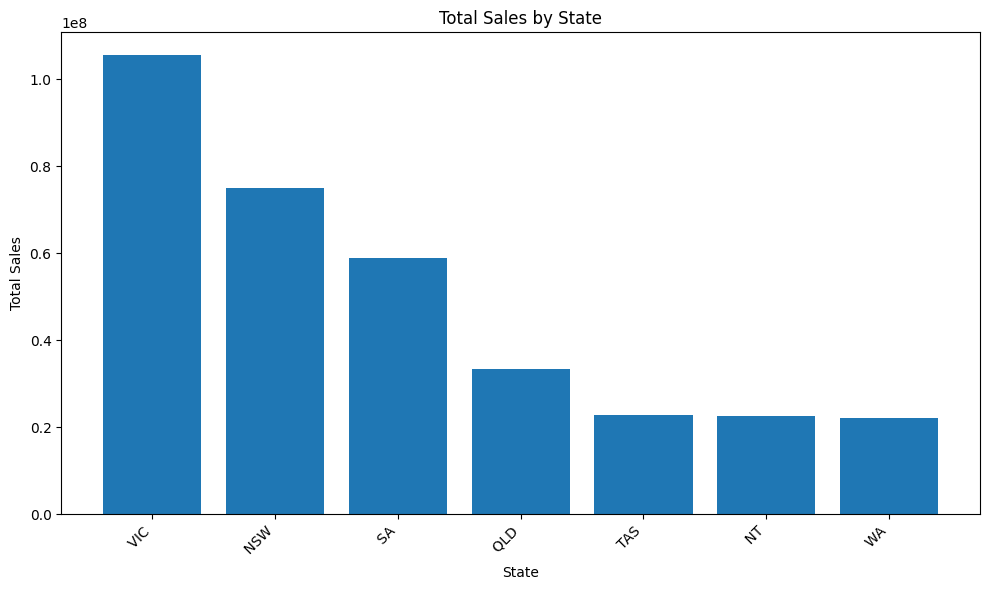

State
 VIC    105565000
 NSW     74970000
 SA      58857500
 QLD     33417500
 TAS     22760000
 NT      22580000
 WA      22152500
Name: Sales, dtype: int64


In [61]:
# the states that are generating the highest revenues and show by graph

import matplotlib.pyplot as plt
# Group by 'State' and sum their sales
state_sales = df.groupby('State').Sales.sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(state_sales.index, state_sales.values)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

print(state_sales)

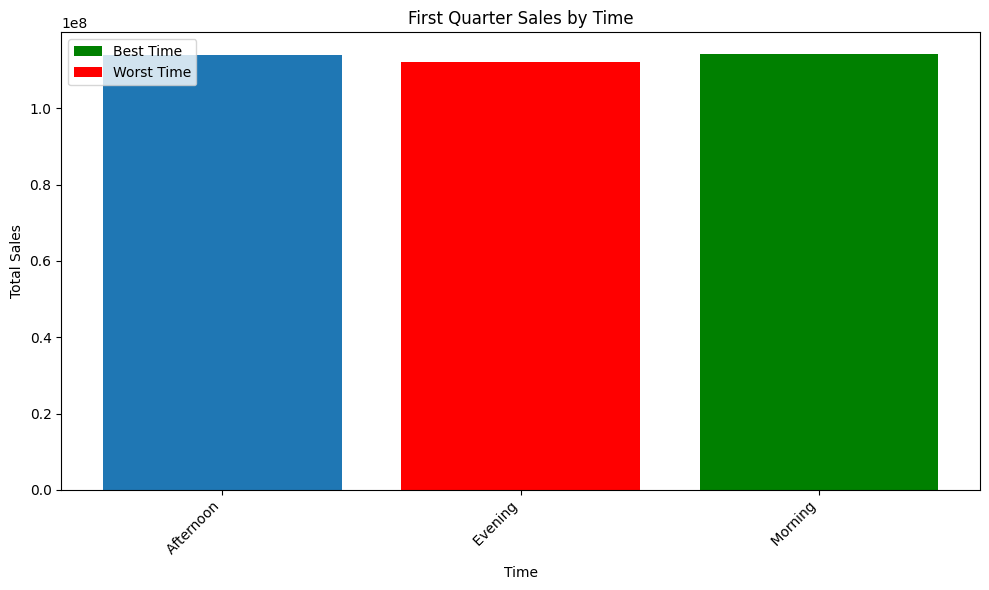

In [62]:
# Filter data for the first quarter (assuming it's October to December)
first_quarter_data = df.loc['2020-10':'2020-12']

# Group by 'Time' and sum their sales
time_sales_first_quarter = first_quarter_data.groupby('Time').Sales.sum()

# Find the best and worst times in terms of sales
best_time = time_sales_first_quarter.idxmax()
worst_time = time_sales_first_quarter.idxmin()

# Create bar chart
plt.figure(figsize=(10,6))
plt.bar(time_sales_first_quarter.index, time_sales_first_quarter.values)
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('First Quarter Sales by Time')

# Highlight best and worst times
plt.bar(best_time, time_sales_first_quarter[best_time], color='green', label='Best Time')
plt.bar(worst_time, time_sales_first_quarter[worst_time], color='red', label='Worst Time')

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

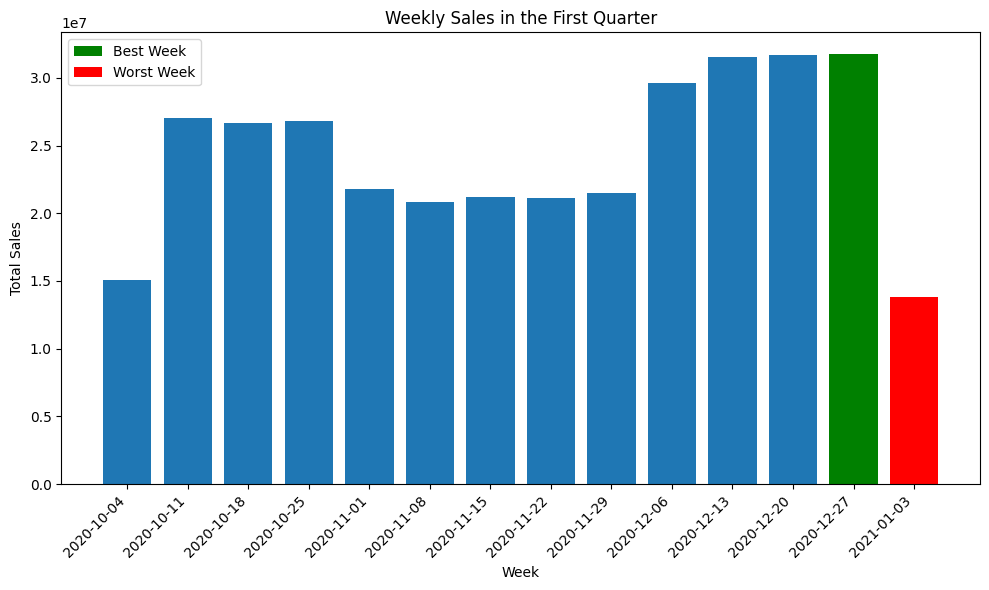

In [63]:
# Resample to weekly data for the first quarter and sum the sales
first_quarter_weekly = df.loc['2020-10':'2020-12'].resample('W').sum()

# Find the best and worst weeks in terms of sales
best_week = first_quarter_weekly['Sales'].idxmax()
worst_week = first_quarter_weekly['Sales'].idxmin()

# Create a bar chart for weekly sales in the first quarter
plt.figure(figsize=(10, 6))
plt.bar(first_quarter_weekly.index.strftime('%Y-%m-%d'), first_quarter_weekly['Sales'])
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.title('Weekly Sales in the First Quarter')
plt.xticks(rotation=45, ha='right')

# Highlight the best and worst weeks
plt.bar(best_week.strftime('%Y-%m-%d'), first_quarter_weekly.loc[best_week, 'Sales'], color='green', label='Best Week')
plt.bar(worst_week.strftime('%Y-%m-%d'), first_quarter_weekly.loc[worst_week, 'Sales'], color='red', label='Worst Week')

plt.legend()
plt.tight_layout()
plt.show()

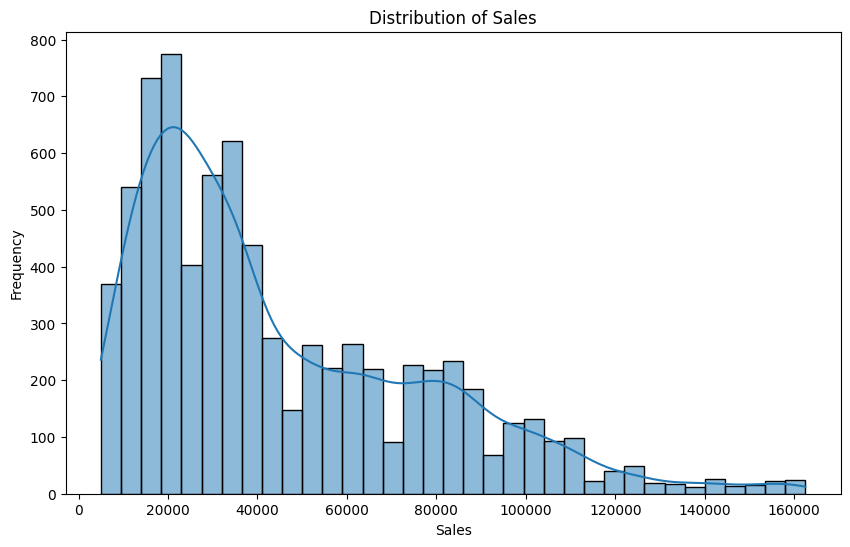

In [64]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

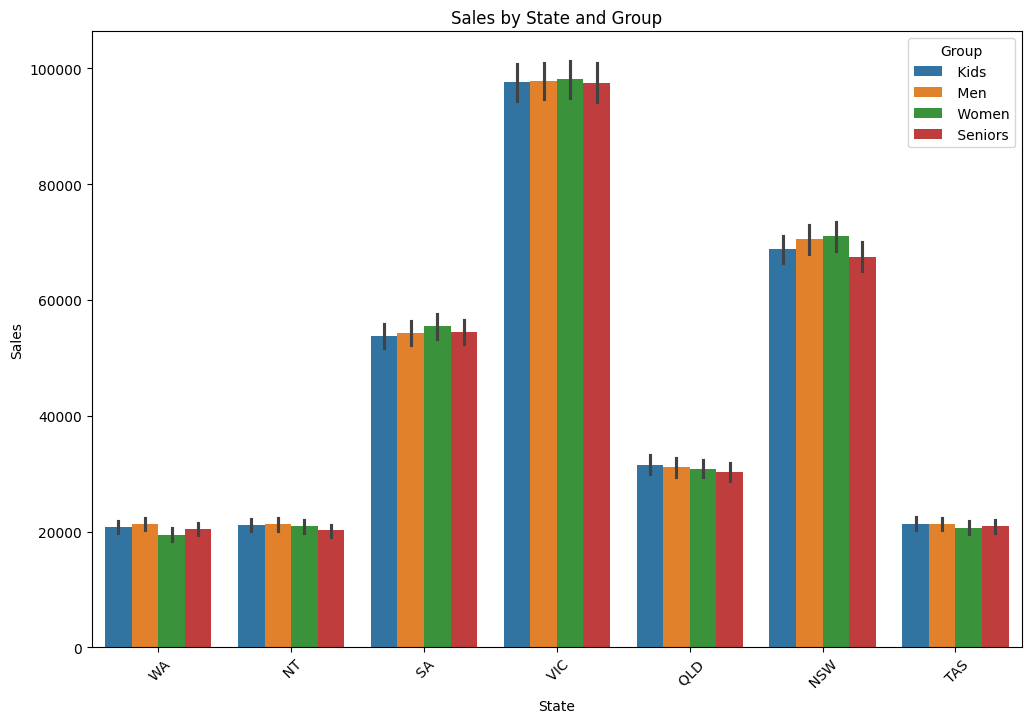

In [65]:
# Sales by State and Group
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('Sales by State and Group')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [66]:
# distribution of sales across states and project sales for next quarter using line graph, lay the line graph on top of the bar graph
# Group sales by state
state_sales = df.groupby('State')['Sales'].sum()
# Project sales for next quarter (assume a 10% growth)
projected_sales = state_sales * 1.1
# Create a bar chart for current sales
fig = go.Figure(data=[
    go.Bar(name='Current Sales', x=state_sales.index, y=state_sales.values)
])
# Add a line chart for projected sales
fig.add_trace(
    go.Scatter(name='Projected Sales', x=projected_sales.index, y=projected_sales.values, mode='lines+markers')
)
# Update layout
fig.update_layout(
    title='Distribution of Sales Across States with Next Quarter Projection',
    xaxis_title='State',
    yaxis_title='Sales',
    plot_bgcolor='rgb(50, 50, 50)'
)
fig.show()

In [67]:
# Group sales by state
state_sales = df.groupby('State')['Sales'].sum()

# Project sales for next quarter (assume a 10% growth)
projected_sales = state_sales * 1.1

# Create a bar chart for current sales
fig = go.Figure(data=[
    go.Bar(name='Current Sales', x=state_sales.index, y=state_sales.values)
])

# Add a line chart for projected sales
fig.add_trace(
    go.Scatter(name='Projected Sales', x=projected_sales.index, y=projected_sales.values, mode='lines+markers')
)

# Update layout
fig.update_layout(
    title='Distribution of Sales Across States with Next Quarter Projection',
    xaxis_title='State',
    yaxis_title='Sales'
)

fig.show()

# Generate report for sales team
report = """
**Sales Report**

**Overall Performance:**

* Total sales for the quarter: ${:,.2f}
* Average daily sales: ${:,.2f}
* Peak sales time: {}

**State-wise Performance:**

* Highest performing state: {} with total sales of ${:,.2f}
* Lowest performing state: {} with total sales of ${:,.2f}

**Group-wise Performance:**

* Highest performing group: {} with total sales of ${:,.2f}
* Lowest performing group: {} with total sales of ${:,.2f}

**Forecast:**

* Projected sales for next quarter: ${:,.2f} (assuming 10% growth)

**Recommendations:**

* Focus on improving sales in {} by [insert specific strategies].
* Capitalize on the peak sales time of {} by [insert specific tactics].
* Consider allocating more resources to the {} group to maximize sales.

**Please refer to the attached chart for a visual representation of sales distribution and forecast.**
""".format(
    df['Sales'].sum(),
    df['Sales'].mean(),
    time_max_sales,
    state_max_sales, state_sales[state_max_sales],
    state_min_sales, state_sales[state_min_sales],
    group_max_sales, grouped_sales[group_max_sales],
    group_min_sales, grouped_sales[group_min_sales],
    projected_sales.sum(),
    state_min_sales,
    time_max_sales,
    group_max_sales
)

print(report)


**Sales Report**

**Overall Performance:**

* Total sales for the quarter: $340,302,500.00
* Average daily sales: $45,013.56
* Peak sales time:  Morning

**State-wise Performance:**

* Highest performing state:  VIC with total sales of $105,565,000.00
* Lowest performing state:  WA with total sales of $22,152,500.00

**Group-wise Performance:**

* Highest performing group:  Men with total sales of $85,750,000.00
* Lowest performing group:  Seniors with total sales of $84,037,500.00

**Forecast:**

* Projected sales for next quarter: $374,332,750.00 (assuming 10% growth)

**Recommendations:**

* Focus on improving sales in  WA by [insert specific strategies].
* Capitalize on the peak sales time of  Morning by [insert specific tactics].
* Consider allocating more resources to the  Men group to maximize sales.

**Please refer to the attached chart for a visual representation of sales distribution and forecast.**



Summary:

**Overall Performance:**

* Total sales for the quarter: $340,302,500.00

* Average daily sales: $45,013.56
* Peak sales time:  Morning

**State-wise Performance:**

* Highest performing state:  VIC with total sales of $105,565,000.00

* Lowest performing state:  WA with total sales of $22,152,500.00

**Group-wise Performance:**

* Highest performing group:  Men with total sales of $85,750,000.00

* Lowest performing group:  Seniors with total sales of $84,037,500.00

**Forecast:**

* Projected sales for next quarter: $374,332,750.00 (assuming 10% growth)

**Recommendations:**

1. In state WA, introduce promotions to improve the sales
2. Bring in new designs specific to Seniors to improve the sales
3. Adjust staffing and promotional activities to align with peak times to maximize sales opportunities.
4. Analysis of quarterly sales data reveals that the highest frequency of transactions occurs at the  20k pricepoint. To boost high-value sales, consider implementing targeted discount strategies for these premium products. These insights can guide inventory management and promotional efforts to optimize revenue across different price segments
